In [283]:

import glob
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib

In [3]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('C:/Users/julia/Downloads/KickstarterFinal/Kickstarter*.csv')], ignore_index = True)
df

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,42,Roguelike | Platformer | Shooter,"{""id"":35,""name"":""Video Games"",""analytics_name""...",3657,AU,Australia,1591152439,"{""id"":1018782761,""name"":""Andrew Von Stieglitz""...",AUD,$,True,USD,1594247312,False,NaN,0.720062,5000.0,947118202,NaN,False,NaN,1591655312,"{""id"":1105779,""name"":""Sydney"",""slug"":""sydney-a...",Paint Rogue,NaN,"{""key"":""assets/029/542/393/098b025d0c25cc15e5b...",5268.22,"{""id"":4007060,""project_id"":4007060,""state"":""ac...",paint-rogue,https://www.kickstarter.com/discover/categorie...,True,False,successful,1594247312,0.69682,"{""web"":{""project"":""https://www.kickstarter.com...",0.694235,3671.000639,international
1,123,“Johnny Rocket” is a 2D comic adventure with a...,"{""id"":35,""name"":""Video Games"",""analytics_name""...",1374,US,the United States,1588694241,"{""id"":264382365,""name"":""Andriy Davydyuk"",""slug...",USD,$,True,USD,1593935267,False,NaN,1.000000,1200.0,426094497,NaN,False,NaN,1591343267,"{""id"":924938,""name"":""Kiev"",""slug"":""kiev-ua"",""s...",Johnny Rocket: 2D comic adventure,NaN,"{""key"":""assets/029/013/447/6e4dc02ebf850eee3ab...",1374.00,"{""id"":3988738,""project_id"":3988738,""state"":""in...",johnny-rocket-2d-comic-adventure,https://www.kickstarter.com/discover/categorie...,True,False,successful,1593935267,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1374.000000,international
2,43,a 6 part web-series about coded bias in a bure...,"{""id"":33,""name"":""Webseries"",""analytics_name"":""...",3630,US,the United States,1626701329,"{""id"":1732744740,""name"":""Brian Padian"",""slug"":...",USD,$,True,USD,1630416951,False,NaN,1.000000,3500.0,44835253,NaN,False,NaN,1627824951,"{""id"":2475687,""name"":""Portland"",""slug"":""portla...",MICROAGGRESSIONS (Season 2),NaN,"{""key"":""assets/034/291/018/adf5e87302d4cbdfdf0...",3630.00,"{""id"":4250793,""project_id"":4250793,""state"":""in...",microaggressions-season-2,https://www.kickstarter.com/discover/categorie...,True,True,successful,1630416951,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,3630.000000,domestic
3,108,"A short-form web series providing a fresh, com...","{""id"":33,""name"":""Webseries"",""analytics_name"":""...",22664,US,the United States,1624325907,"{""id"":2075400293,""name"":""Matt Rosansky"",""slug""...",USD,$,True,USD,1629010740,False,NaN,1.000000,22000.0,1001767271,NaN,False,NaN,1624980774,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",Terminally Chill,NaN,"{""key"":""assets/033/966/045/6d978fc0652620217d7...",22664.00,"{""id"":4237247,""project_id"":4237247,""state"":""in...",terminally-chill,https://www.kickstarter.com/discover/categorie...,True,True,successful,1629010740,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,22664.000000,domestic
4,2386,Ichabod Crane arrives in haunted Sleepy Hollow...,"{""id"":33,""name"":""Webseries"",""analytics_name"":""...",201947,US,the United States,1615432318,"{""id"":1029702011,""name"":""Shipwrecked Comedy"",""...",USD,$,True,USD,1626660000,False,NaN,1.000000,150000.0,1880345176,NaN,False,NaN,1623771677,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Headless: A Sleepy Hollow Story,NaN,"{""key"":""assets/033/889/518/31716a7c01758307fcb...",201947.00,"{""id"":4179436,""project_id"":4179436,""state"":""in...",headless-a-sleepy-hollow-story,https://www.kickstarter.com/discover/categorie...,True,True,successful,1626660000,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,201947.000000,dom

In [4]:
len(df)

230346

In [5]:
df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                     

In [6]:
df.dtypes.value_counts()

object     21
int64       7
float64     6
bool        5
dtype: int64

In [7]:
Missing_values = df.isna().sum()/len(df)
Missing_values.sort_values(ascending=False)

is_starred                  0.999062
is_backing                  0.999062
permissions                 0.999062
friends                     0.999062
location                    0.000868
usd_type                    0.000260
blurb                       0.000035
state_changed_at            0.000000
state                       0.000000
staff_pick                  0.000000
spotlight                   0.000000
static_usd_rate             0.000000
slug                        0.000000
profile                     0.000000
pledged                     0.000000
urls                        0.000000
photo                       0.000000
usd_exchange_rate           0.000000
name                        0.000000
usd_pledged                 0.000000
source_url                  0.000000
backers_count               0.000000
launched_at                 0.000000
currency                    0.000000
category                    0.000000
converted_pledged_amount    0.000000
country                     0.000000
c

In [8]:
Cols=list(Missing_values[(Missing_values>0.50)].index)
df.drop(Cols, axis=1,inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)


In [11]:
df

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,location,name,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged
0,42,Roguelike | Platformer | Shooter,"{""id"":35,""name"":""Video Games"",""analytics_name""...",AU,Australia,1591152439,1594247312,False,5000.0,947118202,False,1591655312,"{""id"":1105779,""name"":""Sydney"",""slug"":""sydney-a...",Paint Rogue,False,successful,0.69682,0.694235,3671.000639
1,123,“Johnny Rocket” is a 2D comic adventure with a...,"{""id"":35,""name"":""Video Games"",""analytics_name""...",US,the United States,1588694241,1593935267,False,1200.0,426094497,False,1591343267,"{""id"":924938,""name"":""Kiev"",""slug"":""kiev-ua"",""s...",Johnny Rocket: 2D comic adventure,False,successful,1.00000,1.000000,1374.000000
2,43,a 6 part web-series about coded bias in a bure...,"{""id"":33,""name"":""Webseries"",""analytics_name"":""...",US,the United States,1626701329,1630416951,False,3500.0,44835253,False,1627824951,"{""id"":2475687,""name"":""Portland"",""slug"":""portla...",MICROAGGRESSIONS (Season 2),True,successful,1.00000,1.000000,3630.000000
3,108,"A short-form web series providing a fresh, com...","{""id"":33,""name"":""Webseries"",""analytics_name"":""...",US,the United States,1624325907,1629010740,False,22000.0,1001767271,False,1624980774,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",Terminally Chill,True,successful,1.00000,1.000000,22664.000000
4,2386,Ichabod Crane arrives in haunted Sleepy Hollow...,"{""id"":33,""name"":""Webseries"",""analytics_name"":""...",US,the United States,1615432318,1626660000,False,150000.0,1880345176,False,1623771677,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Headless: A Sleepy Hollow Story,True,successful,1.00000,1.000000,201947.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230341,10,We would love any help we can get in funding t...,"{""id"":256,""name"":""Spaces"",""analytics_name"":""Sp...",US,the United States,1444166549,1444608000,False,600.0,676753351,False,1444176161,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Ian and Cam's Super Fun BACHELOR DAY,False,successful,1.00000,1.000000,600.000000
230342,73,Character Education Heroes inspires kids to ha...,"{""id"":46,""name"":""Children's Books"",""analytics_...",US,the United States,1536762640,1539928740,False,20000.0,1579378115,False,1537300144,"{""id"":2421374,""name"":""Highland"",""slug"":""highla...",Raising a Problem Solving Child: Character Edu...,False,successful,1.00000,1.000000,20516.000000
230343,4488,A guided journal that helps girls train their ...,"{""id"":46,""name"":""Children's Books"",""analytics_...",US,the United States,1536090064,1539845940,False,100000.0,1281094926,False,1537282485,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",I Am a Rebel Girl: A Journal to Start Revolutions,True,successful,1.00000,1.000000,219012.000000
230344,286,Austin Pendleton directs a rare revival of Ten...,"{""id"":285,""name"":""Plays"",""analytics_name"":""Pla...",US,the United States,1451952585,1458075600,False,15500.0,783009016,False,1454259272,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Orpheus Descending by Tennessee Williams,True,successful,1.00000,1.000000,15705.000000


In [12]:
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [13]:
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

In [14]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
df['sub_category'] = df.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [15]:
df.drop('disable_communication', axis=1, inplace=True)

In [16]:

df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [17]:
df.is_starrable.value_counts(normalize=True)

False    0.975248
True     0.024752
Name: is_starrable, dtype: float64

In [18]:
df.drop('location', axis=1, inplace=True)

In [19]:
df['name_length'] = df['name'].str.split().str.len()
# Drop name variable
df.drop('name', axis=1, inplace=True)


In [20]:
df['usd_pledged'] = round(df['usd_pledged'],2)

In [21]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.day_name()

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.day

In [22]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.day_name()

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.day_name()

# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()

# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [23]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [24]:
# Deadline time
df['deadline_hour'] = df['deadline'].dt.hour # Extracting hour from deadline

def two_hour_deadline(row):
    '''Creates two hour bins from the deadline_hour column'''
    if row['deadline_hour'] in (0,1):
        return '12am-2am'
    if row['deadline_hour'] in (2,3):
        return '2am-4am'
    if row['deadline_hour'] in (4,5):
        return '4am-6am'
    if row['deadline_hour'] in (6,7):
        return '6am-8am'
    if row['deadline_hour'] in (8,9):
        return '8am-10am'
    if row['deadline_hour'] in (10,11):
        return '10am-12pm'
    if row['deadline_hour'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hour'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hour'] in (16,17):
        return '4pm-6pm'
    if row['deadline_hour'] in (18,19):
        return '6pm-8pm'
    if row['deadline_hour'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hour'] in (22,23):
        return '10pm-12am'
    
df['deadline_time'] = df.apply(two_hour_deadline, axis=1) # Calculates bins from launch_time

df.drop('deadline_hour', axis=1, inplace=True)

In [25]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

In [26]:
df.pledge_per_backer.fillna(0, inplace=True)

In [27]:
df = df[df['state'].isin(['successful', 'failed'])]

In [28]:
max(df.deadline)

Timestamp('2022-06-09 04:13:03')

In [29]:
df.drop_duplicates(inplace=True)

C:\Users\julia\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [30]:
df.drop_duplicates(subset = 'id', inplace=True)

In [31]:
df.set_index('id', inplace=True)
df.head()

,backers_count,category,country,country_displayable_name,created_at,deadline,is_starrable,launched_at,staff_pick,state,usd_exchange_rate,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,,,,,,,
947118202,42,games,AU,Australia,2020-06-03 02:47:19,2020-07-08 22:28:32,False,2020-06-08 22:28:32,False,successful,0.694235,3671.0,5,video games,3484.1,2,6,30,Monday,Wednesday,June,July,10pm-12am,10pm-12am,87.40
426094497,123,games,US,the United States,2020-05-05 15:57:21,2020-07-05 07:47:47,False,2020-06-05 07:47:47,False,successful,1.000000,1374.0,13,video games,1200.0,5,31,30,Friday,Sunday,June,July,6am-8am,6am-8am,11.17
44835253,43,film & video,US,the United States,2021-07-19 13:28:49,2021-08-31 13:35:51,False,2021-08-01 13:35:51,True,successful,1.000000,3630.0,10,webseries,3500.0,3,13,30,Sunday,Tuesday,August,August,12pm-2pm,12pm-2pm,84.42
1001767271,108,film & video,US,the United States,2021-06-22 01:38:27,2021-08-15 06:59:00,False,2021-06-29 15:32:54,True,successful,1.000000,22664.0,21,webseries,22000.0,2,8,47,Tuesday,Sunday,June,August,2pm-4pm,6am-8am,209.85
1880345176,2386,film & video,US,the United States,2021-03-11 03:11:58,2021-07-19 02:00:00,False,2021-06-15 15:41:17,True,successful,1.000000,201947.0,23,webseries,150000.0,5,97,33,Tuesday,Monday,June,July,2pm-4pm,2am-4am,84.64


In [66]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers_count.median(),0)))
print("The mea pledge per backer is ${0:,.0f}".format(df.pledge_per_backer.mean()))
print("The mean number of days a campaign is run for is", int(round(df.campaign_days.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $6,865,172,805
The total amount of money pledged by backers is $2,740,511,528
The total amount of money pledged by backers to successful projects is $2,658,018,702

The total number of successful or failed projects launched on Kickstarter is: 189,323
The total number of projects which were successfully funded is: 112,652
The proportion of completed projects which were successfully funded is: 60%

The mean project fundraising goal is $36,262
The mean amount pledged per project is $14,475
The mean amount pledged per successful project is $23,595
The mean amount pledged per failed project is $1,076

The mean number of backers per project is 29
The mea pledge per backer is $77
The mean number of days a campaign is run for is 33


Casos de proyectos exitosos: 112652
Casos de proyectos no exitosos: 76671


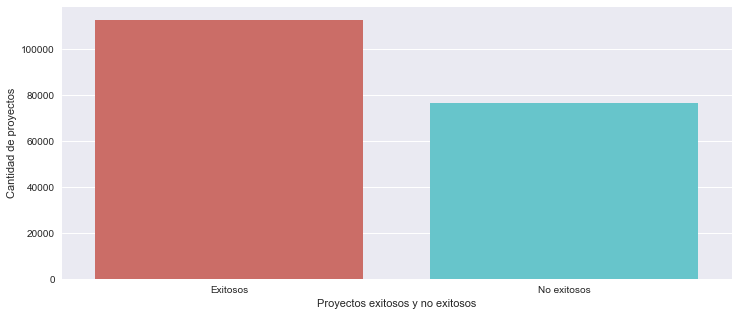

In [60]:
ax = sns.countplot(x=df['state'],data=df,palette='hls',tick_label = ['Exitoso', 'No exitoso'])
plt.xlabel('Proyectos exitosos y no exitosos')
plt.ylabel('Cantidad de proyectos')
ax.set_xticklabels(['Exitosos','No exitosos'])

print('Casos de proyectos exitosos: ' + str(df['state'].eq('successful').sum()))
print('Casos de proyectos no exitosos: '+ str(df['state'].eq('failed').sum()))
print(f"El total de proyectos exitosos es de: {round((df['state'].eq('successful').sum()/df['state'].count()*100),2)} %")

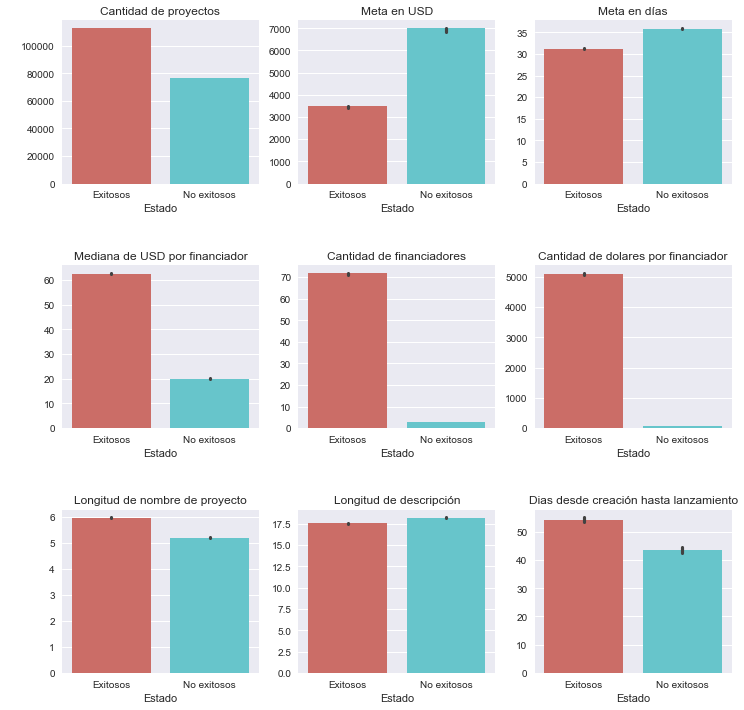

In [132]:
from numpy import median
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

ax1 = sns.countplot(x=df['state'],data=df,palette='hls',tick_label = ['Exitoso', 'No exitoso'], ax = ax1)
ax1.set_xticklabels(['Exitosos','No exitosos'])
ax1.set_title('Cantidad de proyectos')
ax1.set_ylabel(' ')
ax1.set_xlabel('Estado')

ax2 = sns.barplot(x=df.state, y=df.usd_goal,data=df,palette='hls', ax = ax2, estimator=median)
ax2.set_xticklabels(['Exitosos','No exitosos'])
ax2.set_title('Meta en USD')
ax2.set_ylabel(' ')
ax2.set_xlabel('Estado')


ax3 = sns.barplot(x=df.state, y=df.campaign_days,data=df,palette='hls', ax = ax3)
ax3.set_xticklabels(['Exitosos','No exitosos'])
ax3.set_title('Meta en días')
ax3.set_ylabel(' ')
ax3.set_xlabel('Estado')

ax4 = sns.barplot(x=df.state, y=df.pledge_per_backer,data=df,palette='hls', ax = ax4, estimator=median)
ax4.set_xticklabels(['Exitosos','No exitosos'])
ax4.set_title('Mediana de USD por financiador')
ax4.set_ylabel(' ')
ax4.set_xlabel('Estado')

ax5 = sns.barplot(x=df.state, y=df.backers_count,data=df,palette='hls', ax = ax5, estimator=median)
ax5.set_xticklabels(['Exitosos','No exitosos'])
ax5.set_title('Cantidad de financiadores')
ax5.set_ylabel(' ')
ax5.set_xlabel('Estado')


ax6 = sns.barplot(x=df.state, y=df.usd_pledged,data=df,palette='hls', ax = ax6, estimator=median)
ax6.set_xticklabels(['Exitosos','No exitosos'])
ax6.set_title('Cantidad de dolares por financiador')
ax6.set_ylabel(' ')
ax6.set_xlabel('Estado')

ax7 = sns.barplot(x=df.state, y=df.name_length,data=df,palette='hls', ax = ax7)
ax7.set_xticklabels(['Exitosos','No exitosos'])
ax7.set_title('Longitud de nombre de proyecto')
ax7.set_ylabel(' ')
ax7.set_xlabel('Estado')

ax8 = sns.barplot(x=df.state, y=df.blurb_length,data=df,palette='hls', ax = ax8)
ax8.set_xticklabels(['Exitosos','No exitosos'])
ax8.set_title('Longitud de descripción')
ax8.set_ylabel(' ')
ax8.set_xlabel('Estado')

ax9 = sns.barplot(x=df.state, y=df.creation_to_launch_days,data=df,palette='hls', ax = ax9)
ax9.set_xticklabels(['Exitosos','No exitosos'])
ax9.set_title('Dias desde creación hasta lanzamiento')
ax9.set_ylabel(' ')
ax9.set_xlabel('Estado')

fig.subplots_adjust(hspace=0.5)

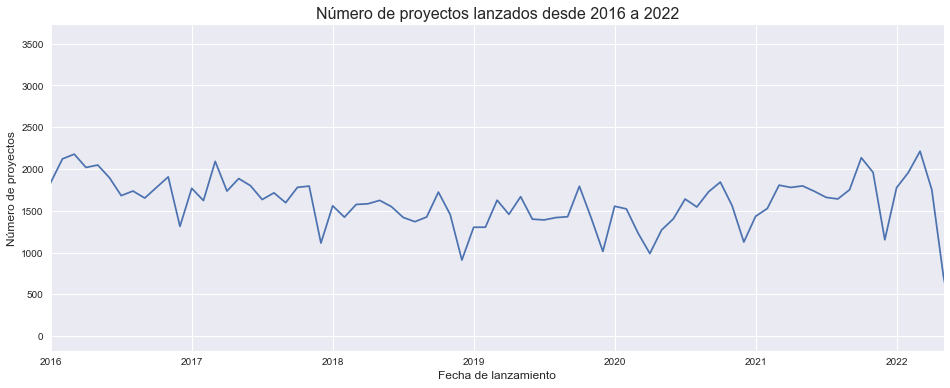

In [130]:
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2016-01-01', '2022-05-07') 
plt.xlabel('Fecha de lanzamiento', fontsize=12)
plt.ylabel('Número de proyectos', fontsize=12)
plt.title('Número de proyectos lanzados desde 2016 a 2022', fontsize=16)
plt.show()

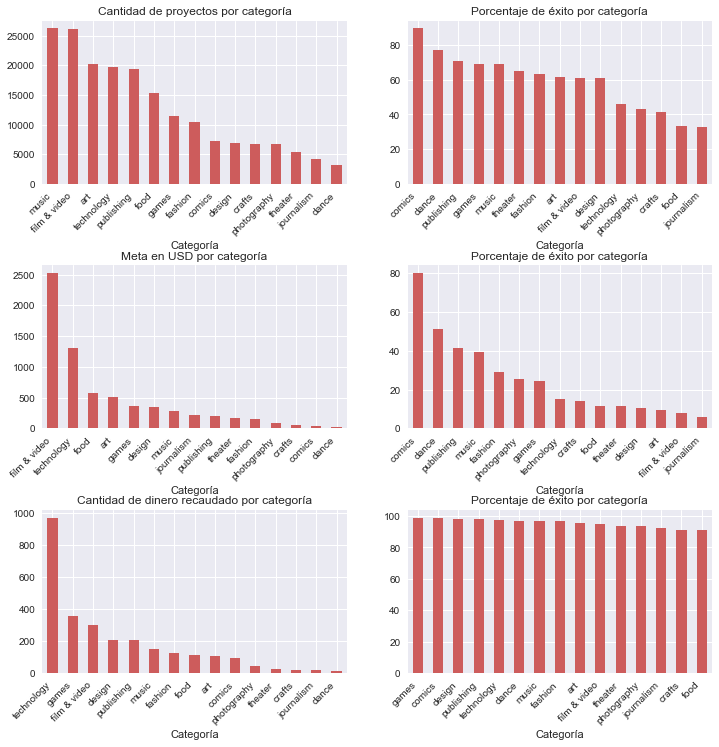

In [264]:
'''Generamos un ranking de personas que más piden prestado dinero por género, estado civil y tipo de educación'''
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))



ax1 = df.groupby(['category'])['category'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax1)
ax1.ticklabel_format(axis="y", style='plain')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Cantidad de proyectos por categoría')
ax1.set_xlabel('Categoría')


ax2 = round(df[df.state=='successful'].groupby(['category'])['category'].count().div((df.groupby(['category'])['category'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax2)
ax2.ticklabel_format(axis="y", style='plain')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Porcentaje de éxito por categoría')
ax2.set_xlabel('Categoría')

ax3 = df.groupby(['category'])['usd_goal'].sum().div(1000000).sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax3)
ax3.ticklabel_format(axis="y", style='plain')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_title('Meta en USD por categoría')
ax3.set_xlabel('Categoría')

ax4 = round(df[df.state=='successful'].groupby(['category'])['usd_goal'].sum().div(1000000).div(df.groupby(['category'])['usd_goal'].sum().div(1000000))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax4)
ax4.ticklabel_format(axis="y", style='plain')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.set_title('Porcentaje de éxito por categoría')
ax4.set_xlabel('Categoría')


ax5 = df.groupby(['category'])['usd_pledged'].sum().div(1000000).sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax5)
ax5.ticklabel_format(axis="y", style='plain')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.set_title('Cantidad de dinero recaudado por categoría')
ax5.set_xlabel('Categoría')

ax6 = round(df[df.state=='successful'].groupby(['category'])['usd_pledged'].sum().div(1000000).div(df.groupby(['category'])['usd_pledged'].sum().div(1000000))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax6)
ax6.ticklabel_format(axis="y", style='plain')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')
ax6.set_title('Porcentaje de éxito por categoría')
ax6.set_xlabel('Categoría')


fig.subplots_adjust(hspace=0.5)

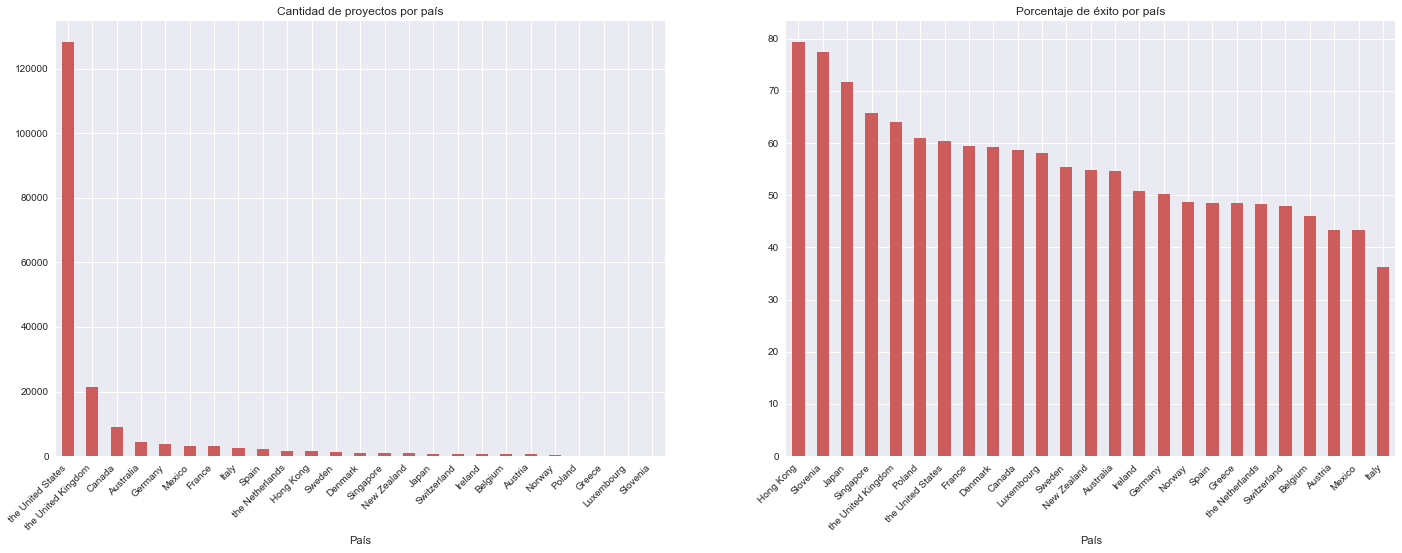

In [267]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,12))



ax1 = df.groupby(['country_displayable_name'])['country_displayable_name'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(12,12),color='indianred', ax=ax1)
ax1.ticklabel_format(axis="y", style='plain')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Cantidad de proyectos por país')
ax1.set_xlabel('País')

ax2 = round(df[df.state=='successful'].groupby(['country_displayable_name'])['country_displayable_name'].count().div((df.groupby(['country_displayable_name'])['country_displayable_name'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,8),color='indianred', ax=ax2)
ax2.ticklabel_format(axis="y", style='plain')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Porcentaje de éxito por país')
ax2.set_xlabel('País')

fig.subplots_adjust(hspace=1)

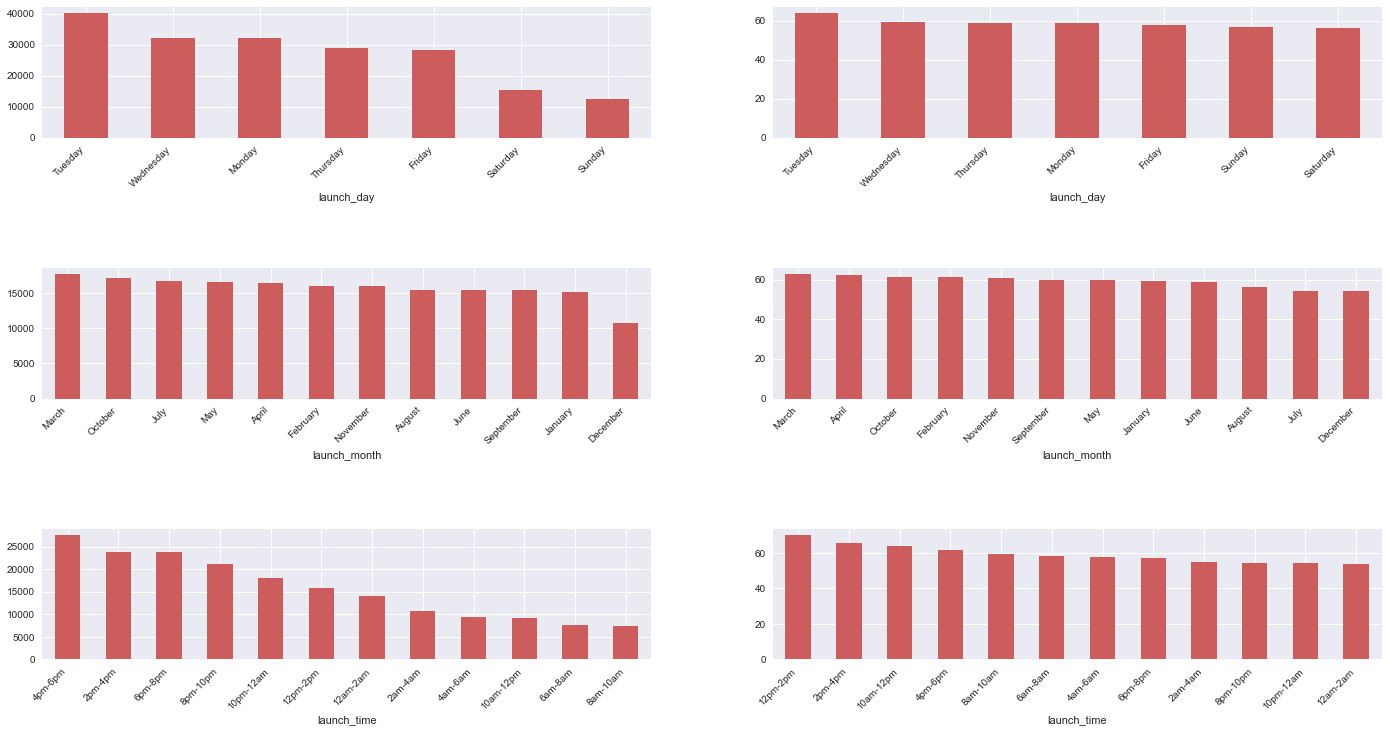

In [254]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(24,12))



ax1 = df.groupby(['launch_day'])['launch_day'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax1)
ax1.ticklabel_format(axis="y", style='plain')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = round(df[df.state=='successful'].groupby(['launch_day'])['launch_day'].count().div((df.groupby(['launch_day'])['launch_day'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax2)
ax2.ticklabel_format(axis="y", style='plain')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')



ax3 = df.groupby(['launch_month'])['launch_month'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax3)
ax3.ticklabel_format(axis="y", style='plain')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

ax4 = round(df[df.state=='successful'].groupby(['launch_month'])['launch_month'].count().div((df.groupby(['launch_month'])['launch_month'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax4)
ax4.ticklabel_format(axis="y", style='plain')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')



ax5 = df.groupby(['launch_time'])['launch_time'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax5)
ax5.ticklabel_format(axis="y", style='plain')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')

ax6 = round(df[df.state=='successful'].groupby(['launch_time'])['launch_time'].count().div((df.groupby(['launch_time'])['launch_time'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax6)
ax6.ticklabel_format(axis="y", style='plain')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

fig.subplots_adjust(hspace=1)

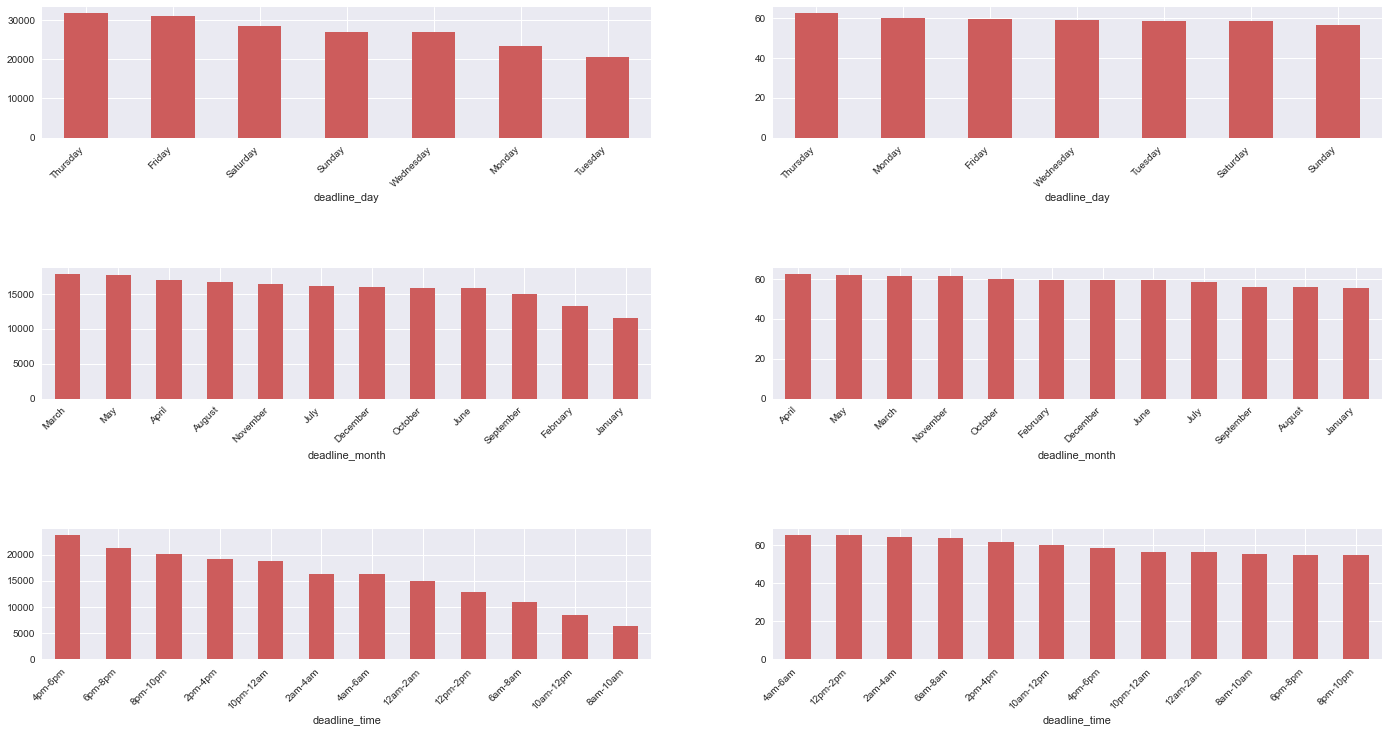

In [270]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(24,12))



ax1 = df.groupby(['deadline_day'])['deadline_day'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax1)
ax1.ticklabel_format(axis="y", style='plain')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = round(df[df.state=='successful'].groupby(['deadline_day'])['deadline_day'].count().div((df.groupby(['deadline_day'])['deadline_day'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax2)
ax2.ticklabel_format(axis="y", style='plain')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')



ax3 = df.groupby(['deadline_month'])['deadline_month'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax3)
ax3.ticklabel_format(axis="y", style='plain')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

ax4 = round(df[df.state=='successful'].groupby(['deadline_month'])['deadline_month'].count().div((df.groupby(['deadline_month'])['deadline_month'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax4)
ax4.ticklabel_format(axis="y", style='plain')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')



ax5 = df.groupby(['deadline_time'])['deadline_time'].count().sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax5)
ax5.ticklabel_format(axis="y", style='plain')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')

ax6 = round(df[df.state=='successful'].groupby(['deadline_time'])['deadline_time'].count().div((df.groupby(['deadline_time'])['deadline_time'].count()))*100,2).sort_values(ascending=False).plot(kind = "bar",figsize=(24,12),color='indianred', ax=ax6)
ax6.ticklabel_format(axis="y", style='plain')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

fig.subplots_adjust(hspace=1)

<AxesSubplot:>

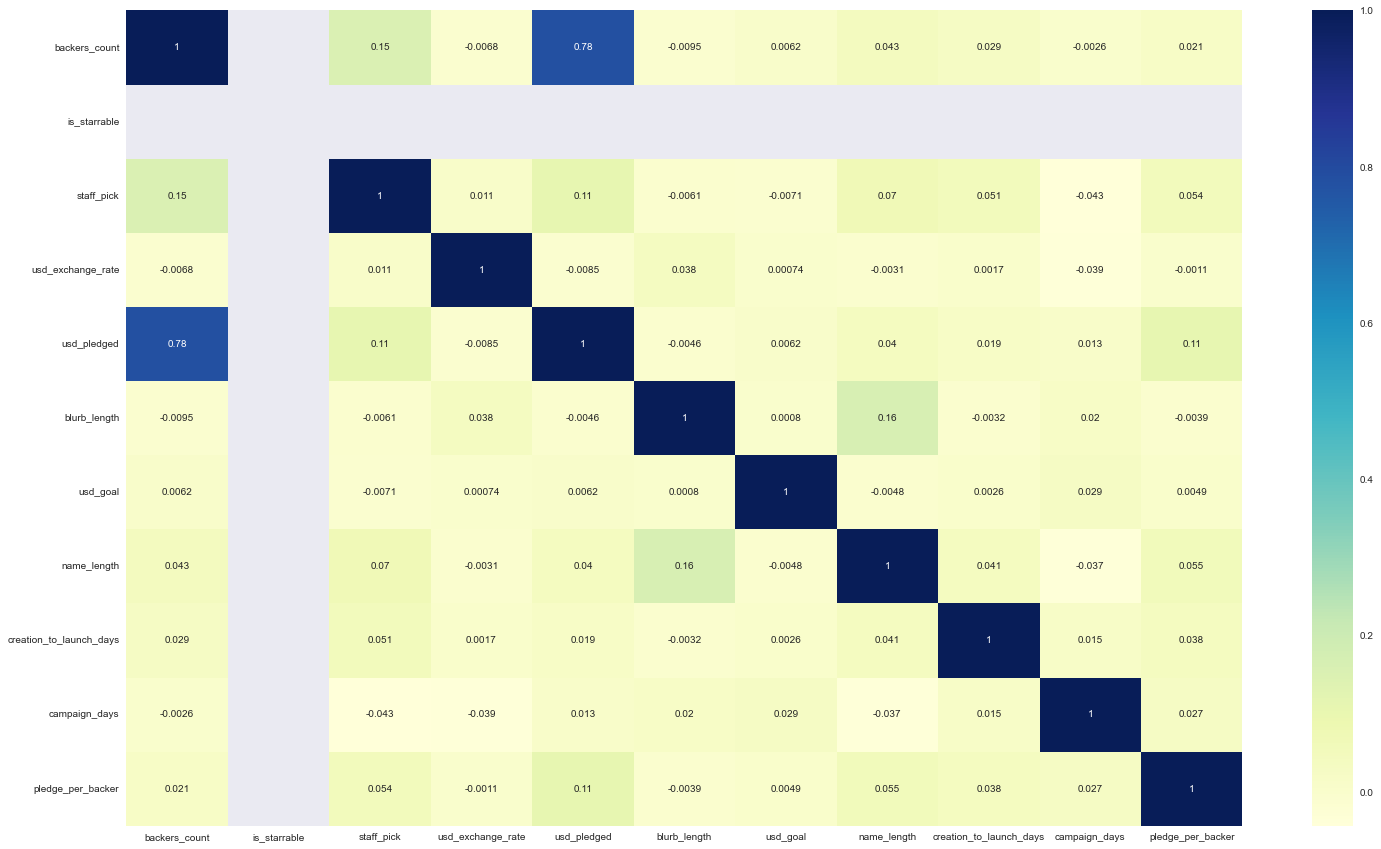

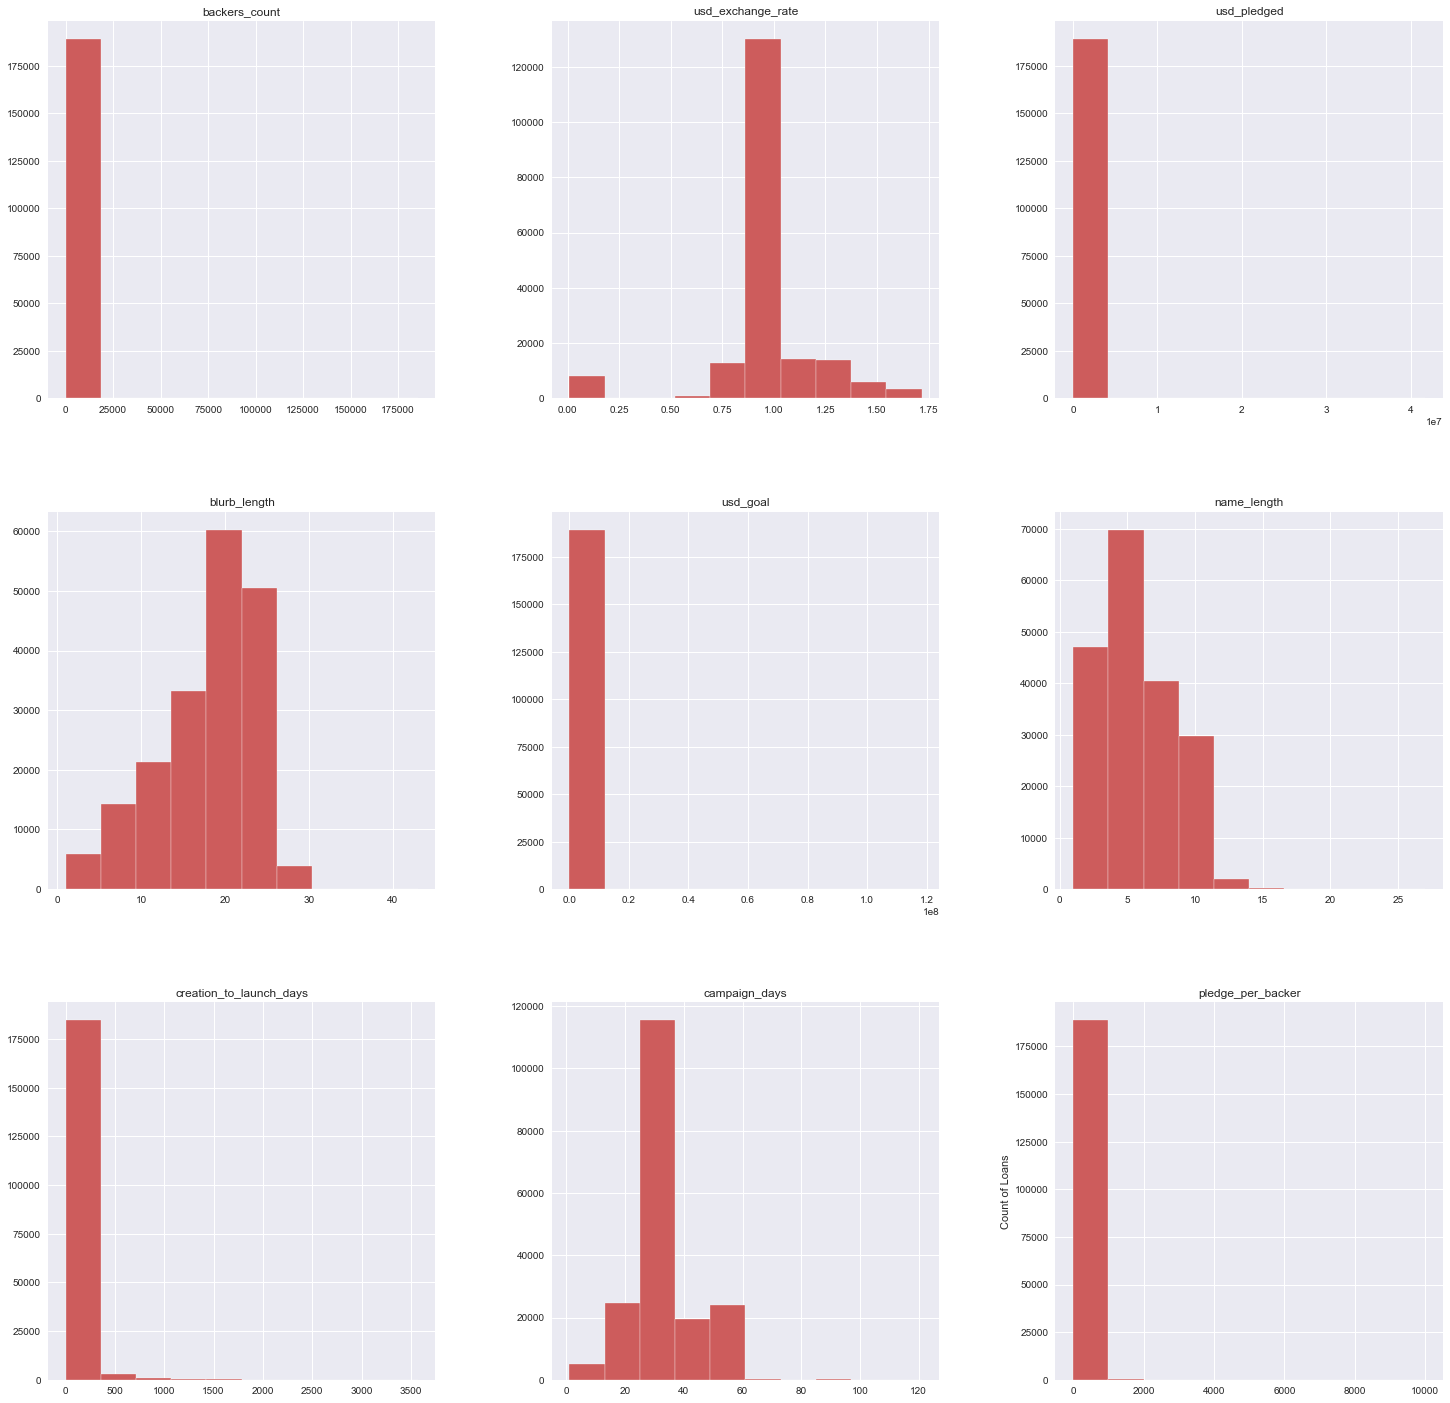

In [262]:
df[df.describe().columns].hist(figsize=(25,25), ec='w', color='indianred')
plt.ylabel("Count of Loans")
plt.show()

In [271]:
df_transformed = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'pledge_per_backer'], axis=1)

<AxesSubplot:>

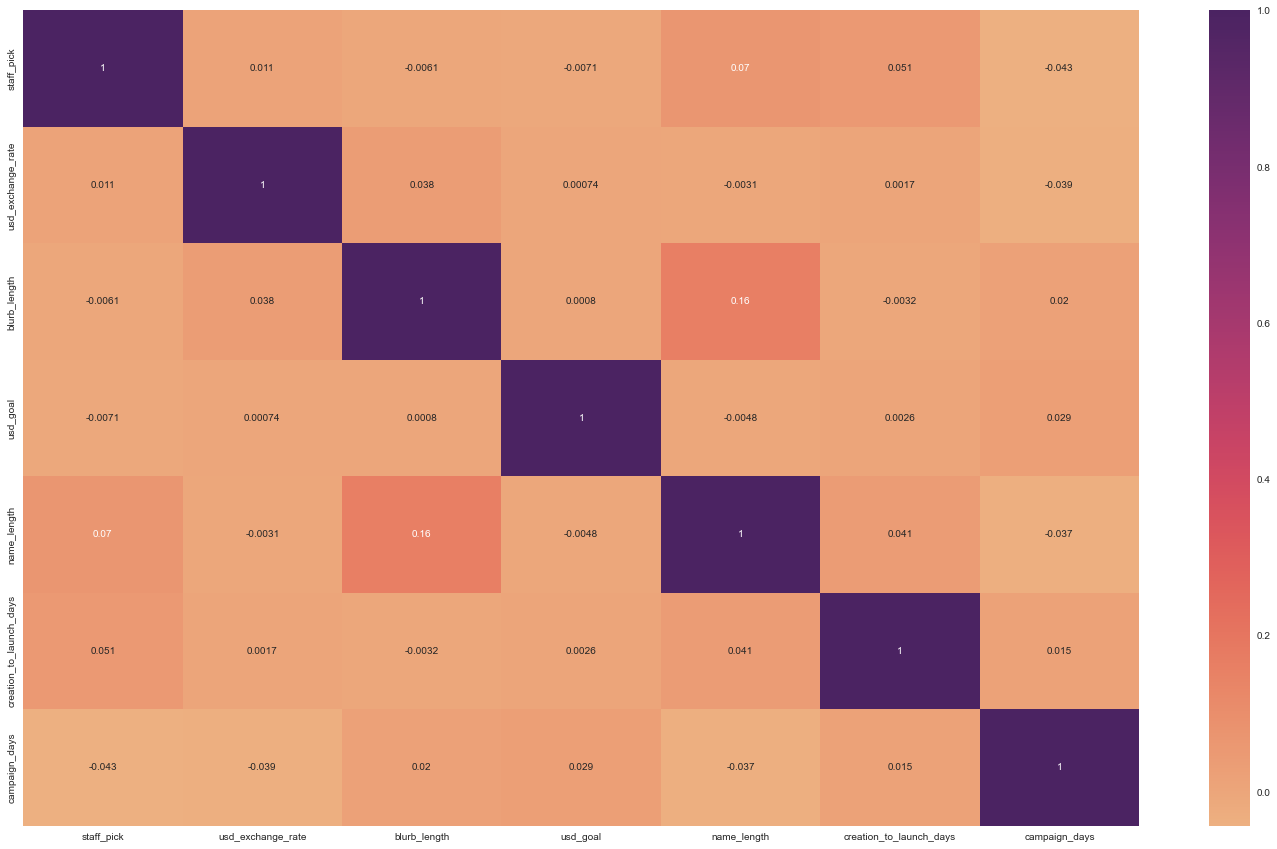

In [275]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_transformed.corr(),annot=True,cmap="flare" , ax=ax)

In [276]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})

In [277]:
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [278]:
df_transformed = pd.get_dummies(df_transformed)

In [279]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [280]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,usd_exchange_rate,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-1.227325,-2.278256,-0.033442,-1.368871,-0.309078,-0.252321,-0.346203,-0.198615,-0.191377,-0.129149,-0.195156,-0.241056,-0.400839,-0.297165,3.934107,-0.151137,-0.40107,-0.191065,-0.337957,-0.340783,-0.172016,-0.052328,6.407268,-0.055959,-0.222571,...,-0.293858,-0.225794,3.077188,-0.284181,-0.303312,-0.246551,-0.380530,-0.228763,-0.41313,-0.205218,-0.379192,-0.202491,-0.355452,-0.215527,3.005586,-0.291923,-0.26919,-0.307591,-0.336218,-0.306406,-0.378271,-0.247105,-0.356121,-0.187879,-0.345533
1,0.005782,-0.855988,-0.035772,-0.248448,-0.133307,-0.252321,-0.346203,-0.198615,-0.191377,-0.129149,-0.195156,-0.241056,-0.400839,-0.297165,3.934107,-0.151137,-0.40107,-0.191065,-0.337957,-0.340783,-0.172016,-0.052328,-0.156073,-0.055959,-0.222571,...,-0.293858,-0.225794,-0.324972,-0.284181,-0.303312,-0.246551,-0.380530,-0.228763,-0.41313,4.872871,-0.379192,-0.202491,-0.355452,-0.215527,-0.332714,-0.291923,-0.26919,-0.307591,-0.336218,-0.306406,-0.378271,4.046857,-0.356121,-0.187879,-0.345533
2,0.005782,-1.389338,-0.033426,-0.995397,-0.259862,-0.252321,-0.346203,-0.198615,-0.191377,-0.129149,-0.195156,-0.241056,2.494767,-0.297165,-0.254187,-0.151137,-0.40107,-0.191065,-0.337957,-0.340783,-0.172016,-0.052328,-0.156073,-0.055959,-0.222571,...,-0.293858,-0.225794,-0.324972,-0.284181,3.296935,-0.246551,-0.380530,-0.228763,-0.41313,-0.205218,-0.379192,-0.202491,-0.355452,-0.215527,-0.332714,-0.291923,3.71485,-0.307591,-0.336218,-0.306406,-0.378271,-0.247105,-0.356121,-0.187879,-0.345533
3,0.005782,0.566280,-0.014551,-1.368871,-0.295016,1.129007,-0.346203,-0.198615,-0.191377,-0.129149,-0.195156,-0.241056,2.494767,-0.297165,-0.254187,-0.151137,-0.40107,-0.191065,-0.337957,-0.340783,-0.172016,-0.052328,-0.156073,-0.055959,-0.222571,...,-0.293858,-0.225794,-0.324972,-0.284181,-0.303312,-0.246551,2.627911,-0.228763,-0.41313,-0.205218,-0.379192,-0.202491,-0.355452,-0.215527,-0.332714,-0.291923,-0.26919,-0.307591,-0.336218,-0.306406,-0.378271,4.046857,-0.356121,-0.187879,-0.345533
4,0.005782,0.921847,0.116044,-0.248448,0.330727,-0.008558,-0.346203,-0.198615,-0.191377,-0.129149,-0.195156,-0.241056,2.494767,-0.297165,-0.254187,-0.151137,-0.40107,-0.191065,-0.337957,-0.340783,-0.172016,-0.052328,-0.156073,-0.055959,-0.222571,...,-0.293858,-0.225794,-0.324972,-0.284181,-0.303312,-0.246551,2.627911,-0.228763,-0.41313,-0.205218,-0.379192,-0.202491,-0.355452,-0.215527,-0.332714,-0.291923,-0.26919,3.251074,-0.336218,-0.306406,-0.378271,-0.247105,-0.356121,-0.187879,-0.345533


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [291]:
modelos = ['LogReg', 'DT', 'RF','CB', 'LGBM']
Acc_Table = pd.DataFrame(columns = modelos)
Acc_Table.loc['Standard'] = [0,0,0,0,0]
Acc_Table.head()

Rec_Table = pd.DataFrame(columns = modelos)
Rec_Table.loc['Standard'] = [0,0,0,0,0]
Rec_Table.head()

,LogReg,DT,RF,CB,LGBM
Standard,0,0,0,0,0


In [292]:
LogReg = LogisticRegression(solver='liblinear', class_weight = "balanced")
DT    = DecisionTreeClassifier(class_weight = "balanced", max_depth = 4)
RF    = RandomForestClassifier(class_weight = "balanced", max_depth = 4)
LGBM   = lgb.LGBMClassifier(class_weight = "balanced", num_leaves = 4, max_depth = 4)
CB = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)

models = [LogReg, DT, RF, CB, LGBM]


col = 0
for model in models:
    model.fit(X_train,y_train.values.ravel())
    Acc_Table.iloc[0,col] = model.score(X_test,y_test)
    predic = model.predict(X_test)
    report = (classification_report(y_test, predic, output_dict=True))
    Rec_Table.iloc[0,col] = report['1']['recall'] 
    #print(model)
    #print(confusion_matrix(y_test, predic))
    
    col += 1
    

    
print('Accuracy')
print(Acc_Table.head()    )
print(" ")
print('Recall')
print(Rec_Table.head())

0:	learn: 0.5973531	total: 58ms	remaining: 58ms
1:	learn: 0.5669791	total: 68.1ms	remaining: 0us
Accuracy
            LogReg        DT        RF        CB     LGBM
Standard  0.710812  0.688065  0.705953  0.709104  0.74106
 
Recall
            LogReg       DT       RF        CB      LGBM
Standard  0.713247  0.71292  0.66638  0.810365  0.760826


In [300]:
y_hat_train = LogReg.predict(X_train)
y_hat_test = LogReg.predict(X_test)

In [301]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     23106
           1       0.78      0.71      0.75     33691

    accuracy                           0.71     56797
   macro avg       0.70      0.71      0.71     56797
weighted avg       0.72      0.71      0.71     56797



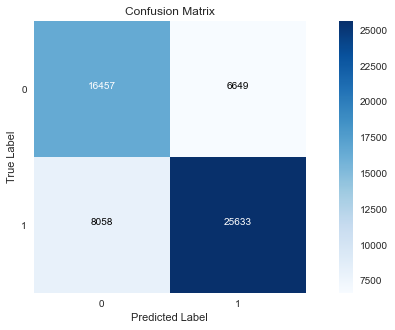

In [299]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
plot_cf(y_test, y_hat_test)